In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy

In [2]:
from functional import *

In [4]:
# Locate the data stored in the HDF5 groups, and put them into arrays
with h5py.File('ccpvdz_8s8p8d_0p04_dx.bin', 'r') as f_x:
    base_items = list(f_x.items())
    print('Items in the base directory: \n', base_items)
    #RT = f_x.get('RT')xx
    #RT_items = list(RT.items())
    #print('\n Items in RT: ', RT_items)
    #energy_x = np.array(RT.get('ENERGY')) 
    #dipole_x = np.array(RT.get('LEN_ELEC_DIPOLE')) 
    #time =  np.array(RT.get('TIME')) 

Items in the base directory: 
 [('INTS', <HDF5 group "/INTS" (51 members)>), ('PINTS', <HDF5 group "/PINTS" (50 members)>), ('PROT_SCF', <HDF5 group "/PROT_SCF" (19 members)>), ('RT', <HDF5 group "/RT" (8 members)>), ('SCF', <HDF5 group "/SCF" (16 members)>)]


In [5]:
# Locate the data stored in the HDF5 groups, and put them into arrays
with h5py.File('ccpvdz_8s8p8d_0p04_dx.bin', 'r') as f_x:
    base_items = list(f_x.items())
    #print('Items in the base directory: \n', base_items)
    RT = f_x.get('RT')
    RT_items = list(RT.items())
    print('\n Items in RT: ', RT_items)
    #energy_x = np.array(RT.get('ENERGY')) 
    #dipole_x = np.array(RT.get('LEN_ELEC_DIPOLE')) 
    #time =  np.array(RT.get('TIME')) 


 Items in RT:  [('ENERGY', <HDF5 dataset "ENERGY": shape (37501,), type "<f8">), ('LEN_ELEC_DIPOLE', <HDF5 dataset "LEN_ELEC_DIPOLE": shape (37501, 3), type "<f8">), ('LEN_ELEC_DIPOLE_FIELD', <HDF5 dataset "LEN_ELEC_DIPOLE_FIELD": shape (37501, 3), type "<f8">), ('TD_1PDM_MZ', <HDF5 dataset "TD_1PDM_MZ": shape (33, 33), type "<c16">), ('TD_1PDM_ORTHO_MZ', <HDF5 dataset "TD_1PDM_ORTHO_MZ": shape (33, 33), type "<c16">), ('TD_1PDM_ORTHO_SCALAR', <HDF5 dataset "TD_1PDM_ORTHO_SCALAR": shape (33, 33), type "<c16">), ('TD_1PDM_SCALAR', <HDF5 dataset "TD_1PDM_SCALAR": shape (33, 33), type "<c16">), ('TIME', <HDF5 dataset "TIME": shape (37501,), type "<f8">)]


In [6]:
# Locate the data stored in the HDF5 groups, and put them into arrays
with h5py.File('ccpvdz_8s8p8d_0p04_dx.bin', 'r') as f_x:
    base_items = list(f_x.items())
    #print('Items in the base directory: \n', base_items)
    RT = f_x.get('RT')
    RT_items = list(RT.items())
    #print('\n Items in RT: ', RT_items)
    energy_x = np.array(RT.get('ENERGY')) 
    dipole_x = np.array(RT.get('LEN_ELEC_DIPOLE')) 
    time =  np.array(RT.get('TIME')) 

In [7]:
energy_x

array([  0.        , -92.84345766, -92.84345766, ..., -92.84345766,
       -92.84345766, -92.84345766])

In [8]:
dipole_x

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.28313531e+00,  2.25714383e-15,  4.17497174e-14],
       [ 1.28312650e+00, -2.43436547e-16,  4.06771153e-14],
       ...,
       [ 1.28323222e+00,  3.10738371e-13,  7.75531427e-14],
       [ 1.28322980e+00,  2.85550494e-13,  8.02958119e-14],
       [ 1.28322718e+00,  2.77539598e-13,  6.84849474e-14]])

In [9]:
time

array([0.00000e+00, 4.00000e-02, 8.00000e-02, ..., 1.49992e+03,
       1.49996e+03, 1.50000e+03])

In [13]:
def read_dataset(fname, path):
    f = h5py.File(fname,'r')
    return numpy.array(f[path])

In [55]:
# Raw data
time = read_dataset('ccpvdz_8s8p8d_0p04_dx.bin', "RT/TIME")[:-1]

ux = read_dataset('ccpvdz_8s8p8d_0p04_dx.bin', "RT/LEN_ELEC_DIPOLE")[:,0][1:]
uy = read_dataset('ccpvdz_8s8p8d_0p04_dy.bin', "RT/LEN_ELEC_DIPOLE")[:,1][1:]
uz = read_dataset('ccpvdz_8s8p8d_0p04_dz.bin', "RT/LEN_ELEC_DIPOLE")[:,2][1:]

In [56]:
ux

array([1.28313531, 1.2831265 , 1.28311811, ..., 1.28323222, 1.2832298 ,
       1.28322718])

In [57]:
uy

array([-2.77946272e-06, -1.20327433e-05, -2.09387537e-05, ...,
        2.85768560e-05,  2.98404020e-05,  3.10768078e-05])

In [58]:
uz

array([-2.77946268e-06, -1.20327433e-05, -2.09387536e-05, ...,
        2.85768558e-05,  2.98404017e-05,  3.10768075e-05])

In [59]:
time

array([0.00000e+00, 4.00000e-02, 8.00000e-02, ..., 1.49988e+03,
       1.49992e+03, 1.49996e+03])

In [61]:
dt = time[1] - time[0]

In [62]:
DAMP = 0.001

In [63]:
signals = [ux, uy, uz]

In [65]:
# Fourier transformed spectra
spects = []
freq = None
for s in signals:
    s -= s[0]
    s *= np.exp(-DAMP*time)
    #w, f = fourier_tx(s, dt, 0)
    w, f = pade_tx(s, dt, (0,5), res = 10000)
    freq = w
    spects.append(f)
total = sum([f.imag for f in spects]) / 3
total *= freq

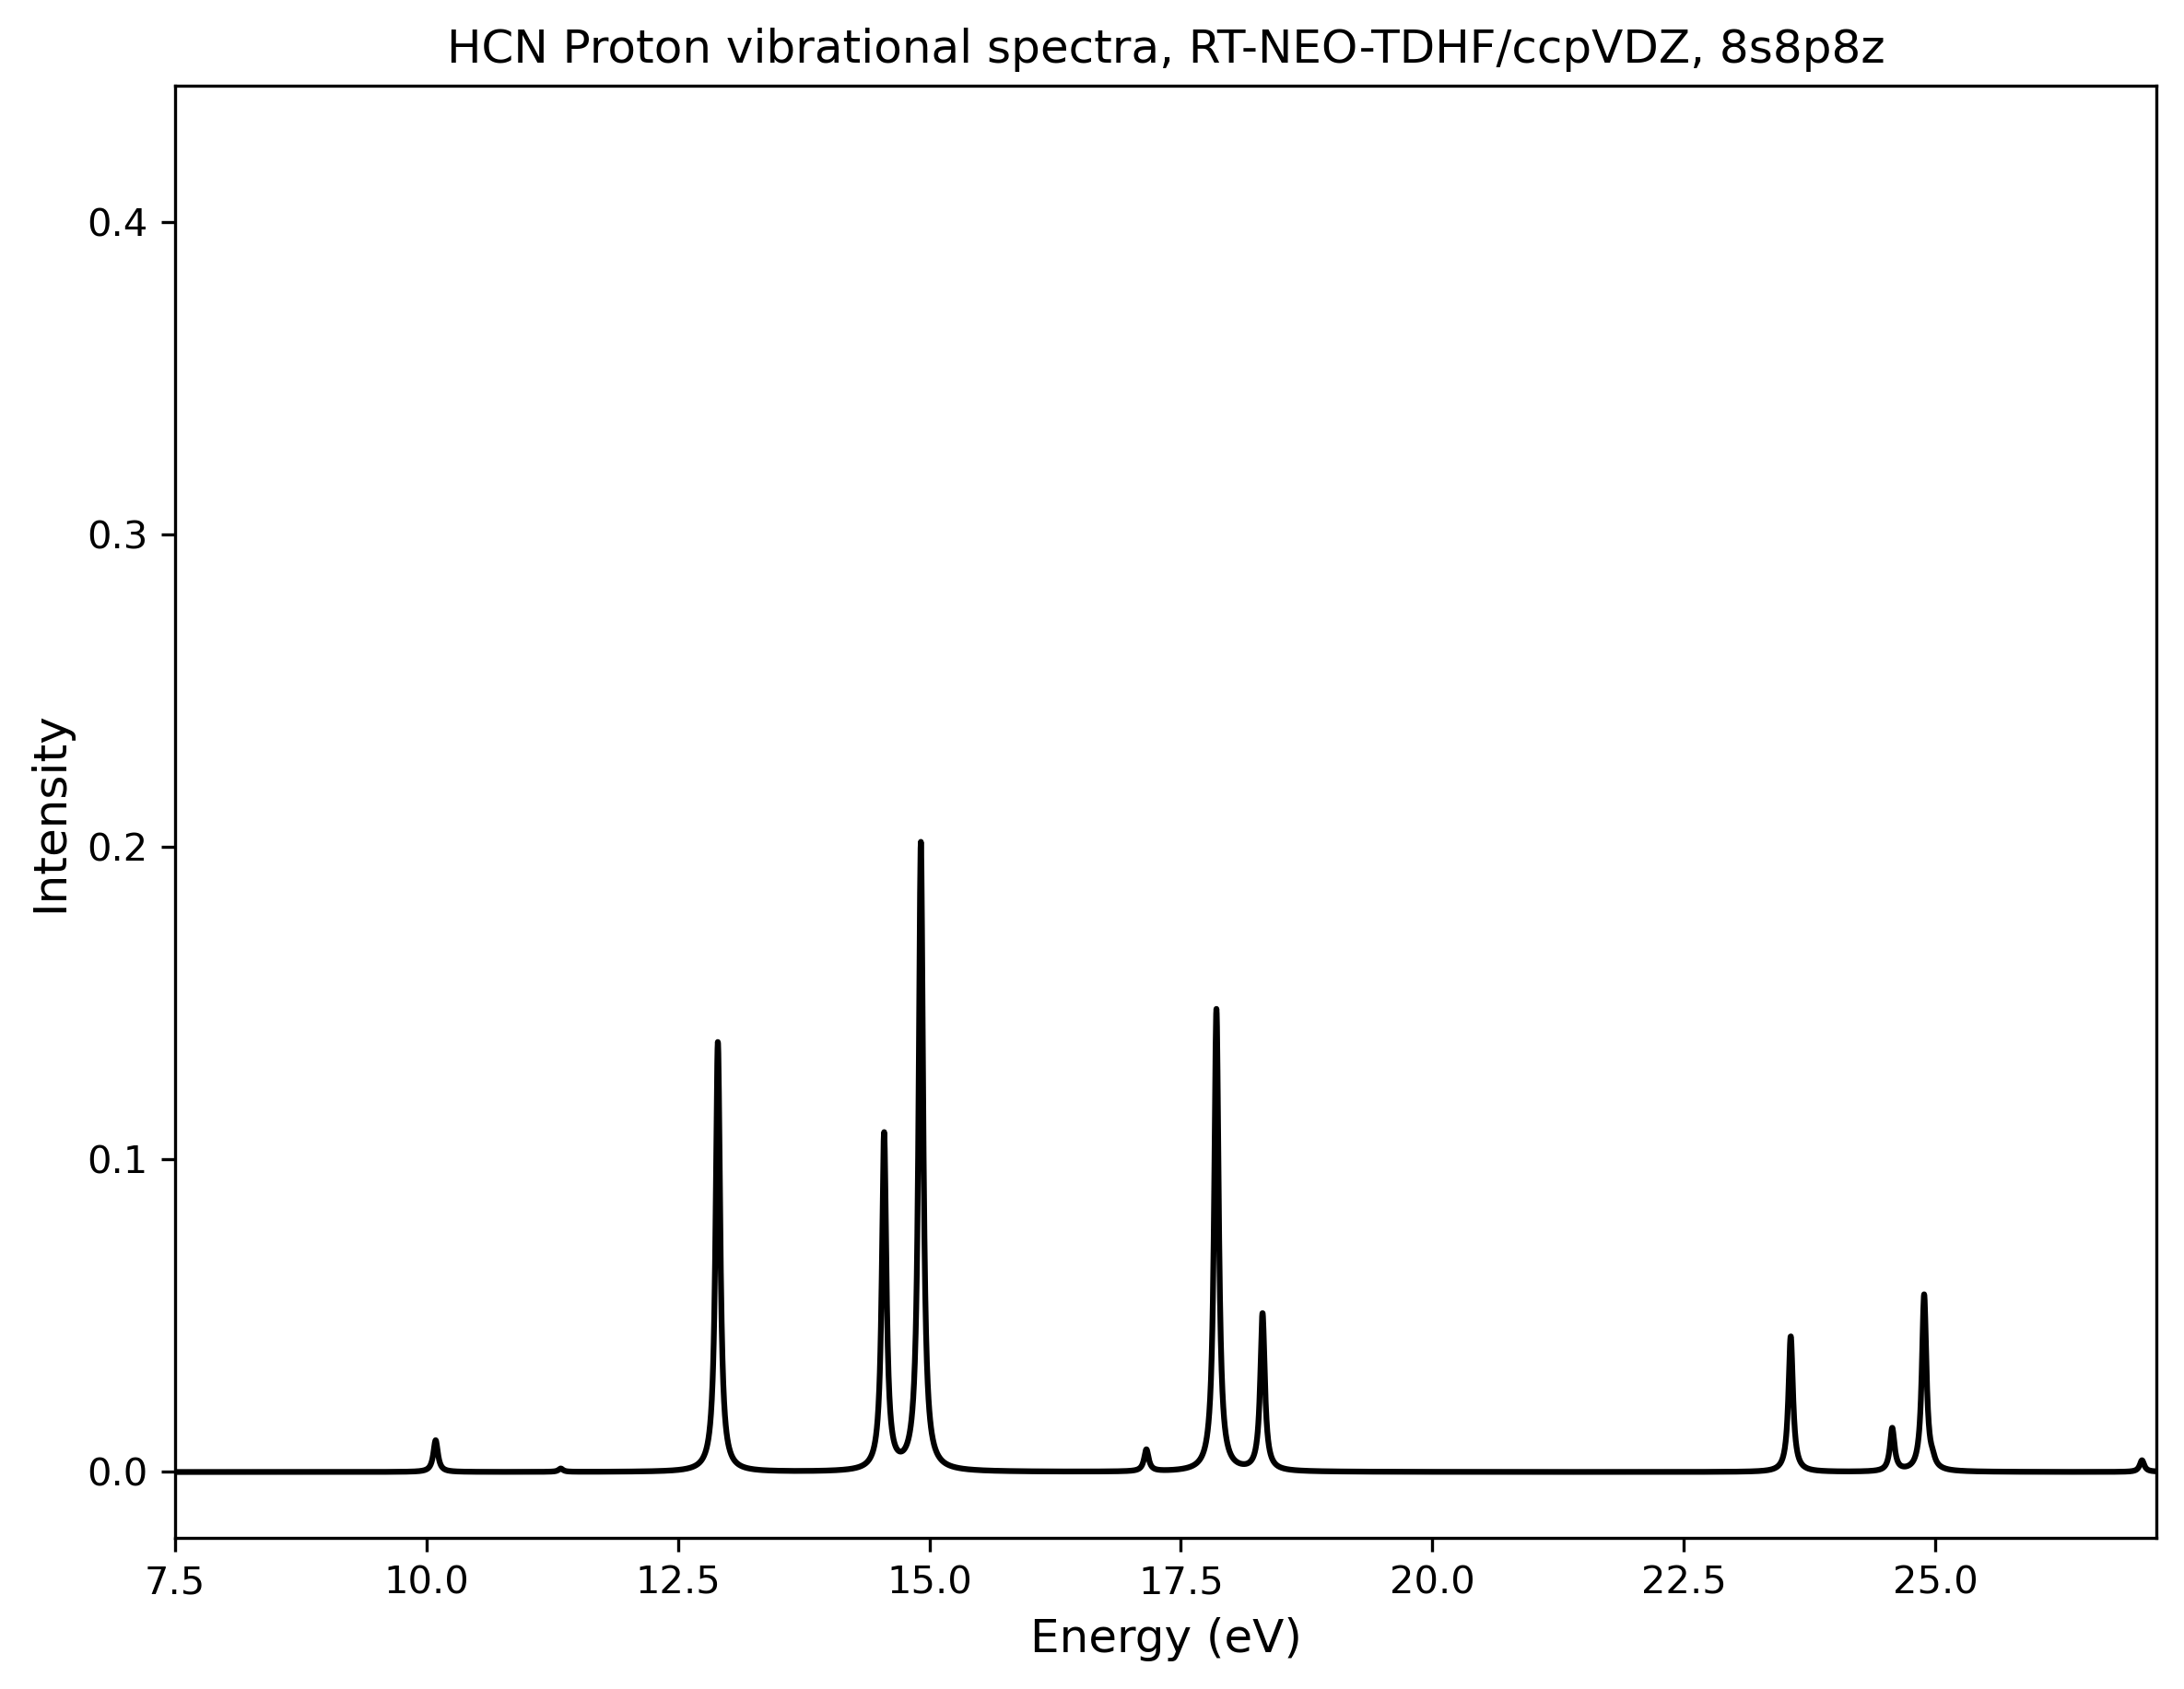

In [74]:
# Plotting
plt.figure(figsize = (8, 6), dpi=300)
plt.plot(freq*27.2114, -total, c='k',label="NEO-TDHF")
plt.xlim(7.5,27.2)
#plt.ylim(0,0.12)
plt.ylabel("Intensity", fontsize=12)
plt.xlabel("Energy (eV)", fontsize=12)
plt.tight_layout()
#plt.legend(loc="upper left")
plt.title("HCN Proton vibrational spectra, RT-NEO-TDHF/ccpVDZ, 8s8p8z")
plt.savefig("test.pdf")
plt.show()

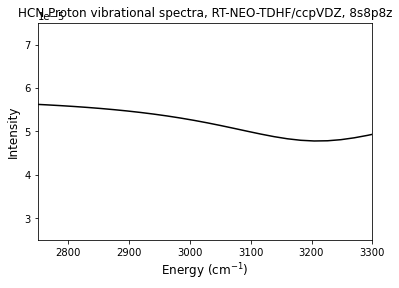

In [100]:
# Plotting
plt.plot(freq*27.2114*8065.54429, total, c='k')
plt.xlim(2750,3300)
plt.ylim(0.000025,0.000075)
plt.ylabel("Intensity", fontsize=12)
plt.xlabel("Energy (cm$^{-1}$)", fontsize=12)
plt.title("HCN Proton vibrational spectra, RT-NEO-TDHF/ccpVDZ, 8s8p8z")
#plt.savefig("HCN_vib_spec.pdf")
plt.show()


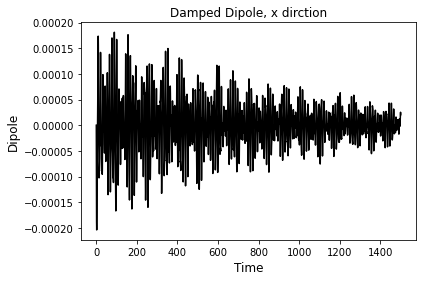

In [67]:
# Plotting
plt.plot(time, ux, c='k')
plt.ylabel("Dipole", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.title("Damped Dipole, x dirction")
#plt.savefig("HCN_vib_spec.pdf")
plt.show()